In [3]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

class CrossOverStrategy(bt.Strategy):
    params = (('short_window', 50), ('long_window', 200), ('commission', 1), ('initial_cash', 5000))

    def __init__(self):
        self.short_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_window)
        self.long_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_window)
        self.cash = self.params.initial_cash
        self.size = None

    def next(self):
        if not self.position and self.short_mavg[0] > self.long_mavg[0] and self.data.close[0] > self.data.close[-1]:
            self.buy(size=self.get_position_size())

        elif not self.position and self.short_mavg[0] < self.long_mavg[0] and self.data.close[0] < self.data.close[-1]:
            self.sell(size=self.get_position_size())

    def get_position_size(self):
        if self.size is None:
            return 100  # Tamaño inicial de la posición
        else:
            return self.size

    def notify_trade(self, trade):
        if trade.justopened:
            self.size = trade.size
        elif trade.status in [bt.Order.Completed, bt.Order.Canceled, bt.Order.Margin]:
            self.size = None

# Símbolo del activo que quieres probar (por ejemplo, 'AAPL' para Apple Inc.)
symbol = 'AAPL'

# Descargar datos históricos desde Yahoo Finance (puedes cambiar las fechas si lo deseas)
data = yf.download(symbol, start='2020-01-01', end='2023-01-01')

# Definir los periodos de las medias móviles
short_window = 10
long_window = 200

# Definir el capital inicial y el costo por operación
initial_cash = 5000
commission = 1

cerebro = bt.Cerebro()

# Añadir el activo a backtrader
data = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data)

# Añadir la estrategia a backtrader
cerebro.addstrategy(CrossOverStrategy, short_window=short_window, long_window=long_window, initial_cash=initial_cash)

# Añadir el tamaño de la posición y la comisión
cerebro.addsizer(bt.sizers.FixedSize, stake=100)

# Añadir el impacto de la comisión
cerebro.broker.setcommission(commission=commission)

# Añadir el capital inicial
cerebro.broker.setcash(initial_cash)

# Ejecutar el backtest
cerebro.run()

# Mostrar los resultados
final_value = cerebro.broker.getvalue()
print(f"Valor final de la cartera: {final_value:.2f}€")

# Graficar los resultados
cerebro.plot()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Valor final de la cartera: -7993.00€


Valor final de la cartera: -7993.00€


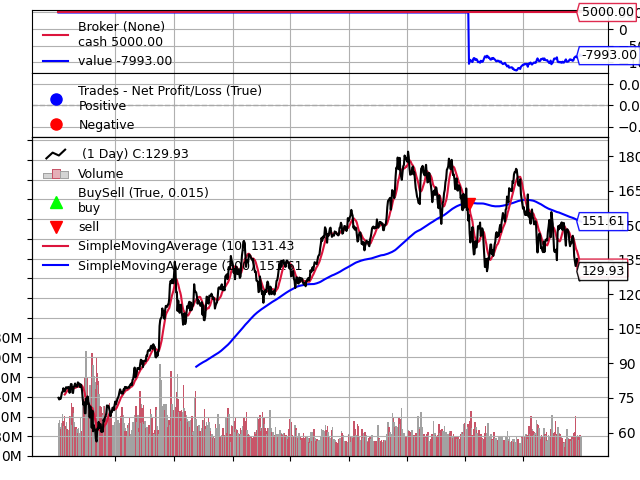

In [ ]:
# ... Código anterior ...

# Ejecutar el backtest
cerebro.run()

# Mostrar los resultados
final_value = cerebro.broker.getvalue()
print(f"Valor final de la cartera: {final_value:.2f}€")

# Graficar los resultados y guardar como una imagen
cerebro.plot()
plt.savefig('backtest_result.png')

# Mostrar la imagen guardada
from IPython.display import Image
Image('backtest_result.png')


In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72028 sha256=f7c6763dde44ad2918fa8683c7b5ec2cbb1e9ba0852d8622a420fbc1c4b335fd
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import optunity.metrics as optunity_metrics
import optunity.solvers as optunity_solvers

class CrossOverStrategy(bt.Strategy):
    params = (('short_window', 50), ('long_window', 200), ('commission', 1), ('initial_cash', 5000))

    def __init__(self):
        self.short_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_window)
        self.long_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_window)
        self.cash = self.params.initial_cash
        self.size = None

    def next(self):
        if not self.position and self.short_mavg[0] > self.long_mavg[0] and self.data.close[0] > self.data.close[-1]:
            self.buy(size=self.get_position_size())

        elif not self.position and self.short_mavg[0] < self.long_mavg[0] and self.data.close[0] < self.data.close[-1]:
            self.sell(size=self.get_position_size())

    def get_position_size(self):
        if self.size is None:
            return 100  # Tamaño inicial de la posición
        else:
            return self.size

    def notify_trade(self, trade):
        if trade.justopened:
            self.size = trade.size
        elif trade.status in [bt.Order.Completed, bt.Order.Canceled, bt.Order.Margin]:
            self.size = None

def run_backtest(data, short_window, long_window, initial_cash, commission):
    cerebro = bt.Cerebro()

    # Añadir el activo a backtrader
    data = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data)

    # Añadir la estrategia a backtrader
    cerebro.addstrategy(CrossOverStrategy, short_window=short_window, long_window=long_window, initial_cash=initial_cash)

    # Añadir el tamaño de la posición y la comisión
    cerebro.addsizer(bt.sizers.FixedSize, stake=100)

    # Añadir el impacto de la comisión
    cerebro.broker.setcommission(commission=commission)

    # Añadir el capital inicial
    cerebro.broker.setcash(initial_cash)

    # Ejecutar el backtest
    cerebro.run()

    # Obtener el rendimiento anualizado
    returns = cerebro.runstrats[0][0].analyzers.returns.get_analysis()
    annualized_return = optunity_metrics.annualized_return(returns, 252)  # 252 días hábiles en un año

    return annualized_return

# Símbolo del activo que quieres probar (por ejemplo, 'AAPL' para Apple Inc.)
symbol = 'AAPL'

# Descargar datos históricos desde Yahoo Finance (puedes cambiar las fechas si lo deseas)
data = yf.download(symbol, start='2019-01-01', end='2021-12-31')

# Definir los límites para los parámetros de optimización
search_space = {'short_window': [10, 100], 'long_window': [100, 300], 'initial_cash': [1000, 10000], 'commission': [0, 10]}

# Realizar la optimización utilizando el retorno anualizado como objetivo a maximizar
optimal_params, _, _ = optunity_solvers.grid_search(run_backtest, **search_space, maximize='returns')

# Mostrar los parámetros óptimos
print("Parámetros óptimos encontrados:")
print(optimal_params)

# Ejecutar el backtest con los parámetros óptimos
annualized_return = run_backtest(data, **optimal_params)
print(f"Retorno anualizado con los parámetros óptimos: {annualized_return:.2%}")

# Mostrar los resultados
cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data)
cerebro.addstrategy(CrossOverStrategy, **optimal_params)
cerebro.addsizer(bt.sizers.FixedSize, stake=100)
cerebro.broker.setcommission(commission=optimal_params['commission'])
cerebro.broker.setcash(optimal_params['initial_cash'])
cerebro.run()
cerebro.plot()


[*********************100%***********************]  1 of 1 completed


AttributeError: ignored

In [ ]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import optunity.metrics as optunity_metrics
import optunity

class CrossOverStrategy(bt.Strategy):
    params = (('short_window', 50), ('long_window', 200), ('commission', 1), ('initial_cash', 5000))

    def __init__(self):
        self.short_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_window)
        self.long_mavg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_window)
        self.cash = self.params.initial_cash
        self.size = None

    def next(self):
        if not self.position and self.short_mavg[0] > self.long_mavg[0] and self.data.close[0] > self.data.close[-1]:
            self.buy(size=self.get_position_size())

        elif not self.position and self.short_mavg[0] < self.long_mavg[0] and self.data.close[0] < self.data.close[-1]:
            self.sell(size=self.get_position_size())

    def get_position_size(self):
        if self.size is None:
            return 100  # Tamaño inicial de la posición
        else:
            return self.size

    def notify_trade(self, trade):
        if trade.justopened:
            self.size = trade.size
        elif trade.status in [bt.Order.Completed, bt.Order.Canceled, bt.Order.Margin]:
            self.size = None

def run_backtest(data, short_window, long_window, initial_cash, commission):
    cerebro = bt.Cerebro()

    # Añadir el activo a backtrader
    data = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data)

    # Añadir la estrategia a backtrader
    cerebro.addstrategy(CrossOverStrategy, short_window=short_window, long_window=long_window, initial_cash=initial_cash)

    # Añadir el tamaño de la posición y la comisión
    cerebro.addsizer(bt.sizers.FixedSize, stake=100)

    # Añadir el impacto de la comisión
    cerebro.broker.setcommission(commission=commission)

    # Añadir el capital inicial
    cerebro.broker.setcash(initial_cash)

    # Ejecutar el backtest
    cerebro.run()

    # Obtener el rendimiento anualizado
    analyzer = cerebro.runstrats[0][0].analyzers.returns
    annualized_return = optunity_metrics.annualized_return(analyzer.get_analysis(), 252)  # 252 días hábiles en un año

    return annualized_return

# Símbolo del activo que quieres probar (por ejemplo, 'AAPL' para Apple Inc.)
symbol = 'AAPL'

# Descargar datos históricos desde Yahoo Finance (puedes cambiar las fechas si lo deseas)
data = yf.download(symbol, start='2019-01-01', end='2021-12-31')

# Definir los límites para los parámetros de optimización
search_space = {'short_window': [10, 100], 'long_window': [100, 300], 'initial_cash': [1000, 10000], 'commission': [0, 10]}

# Realizar la optimización utilizando el retorno anualizado como objetivo a maximizar
optimal_params, _ = optunity.maximize(run_backtest, solver_name='particle swarm', num_evals=100, **search_space,data=data)

# Mostrar los parámetros óptimos
print("Parámetros óptimos encontrados:")
print(optimal_params)

# Ejecutar el backtest con los parámetros óptimos
annualized_return = run_backtest(data, **optimal_params)
print(f"Retorno anualizado con los parámetros óptimos: {annualized_return:.2%}")

# Mostrar los resultados
cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data)
cerebro.addstrategy(CrossOverStrategy, **optimal_params)
cerebro.addsizer(bt.sizers.FixedSize, stake=100)
cerebro.broker.setcommission(commission=optimal_params['commission'])
cerebro.broker.setcash(optimal_params['initial_cash'])
cerebro.run()
cerebro.plot()


[*********************100%***********************]  1 of 1 completed


AssertionError: ignored

In [ ]:
!pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.3 MB/s eta 0:00:00
